<a href="https://colab.research.google.com/github/SAMYSOSERIOUS/Stats-analytics/blob/main/GroupExercice2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Data :Letter Recognition**
Source:https://archive.ics.uci.edu/dataset/59/letter+recognition

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

letter_recognition = fetch_ucirepo(id=59)

X = letter_recognition.data.features
y = letter_recognition.data.targets


X.head()



,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
y.head()

,lettr
0,T
1,I
2,D
3,N
4,G


# **Feedforward Neural Network (FFNN)**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2876 - loss: 2.4931 - val_accuracy: 0.7016 - val_loss: 1.0746
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6322 - loss: 1.1812 - val_accuracy: 0.7800 - val_loss: 0.8007
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7119 - loss: 0.9172 - val_accuracy: 0.8044 - val_loss: 0.6742
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7504 - loss: 0.8002 - val_accuracy: 0.8288 - val_loss: 0.5902
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7757 - loss: 0.7111 - val_accuracy: 0.8419 - val_loss: 0.5345
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7904 - loss: 0.6654 - val_accuracy: 0.8659 - val_loss: 0.4739
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8114 - loss: 0.5943 - val_accuracy: 0.8747 - val_loss: 0.4351
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8154 - loss: 0.5870 - val_accuracy: 0.

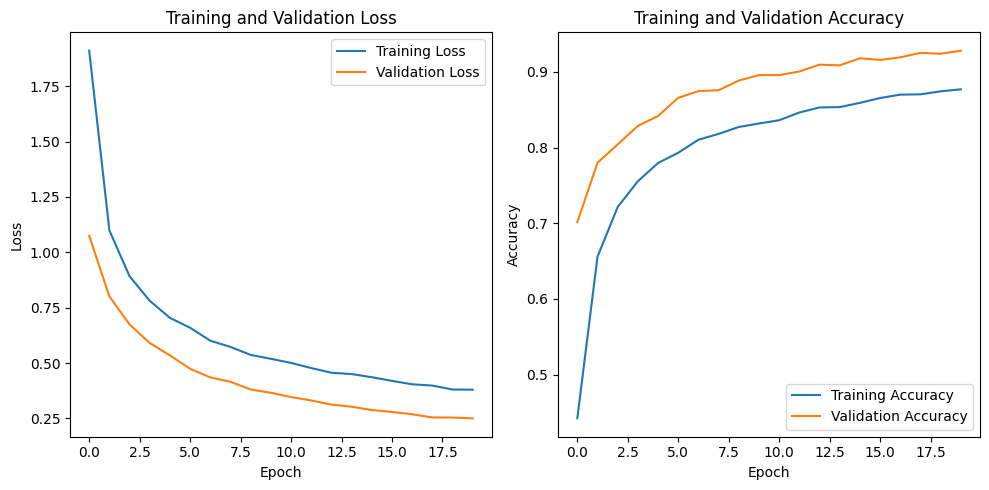

In [4]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


le = LabelEncoder()
y_encoded = le.fit_transform(y['lettr'])

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')  ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)


loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **Convolutional Neural Network**

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3568 - loss: 2.3836 - val_accuracy: 0.6875 - val_loss: 1.1108
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7179 - loss: 0.9919 - val_accuracy: 0.7563 - val_loss: 0.8522
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7738 - loss: 0.7893 - val_accuracy: 0.7797 - val_loss: 0.7327
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8008 - loss: 0.6691 - val_accuracy: 0.8066 - val_loss: 0.6474
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8255 - loss: 0.5987 - val_accuracy: 0.8288 - val_loss: 0.5784
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8533 - loss: 0.5157 - val_accuracy: 0.8416 - val_loss: 0.5292
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8624 - loss: 0.4734 - val_accuracy: 0.8547 - val_loss: 0.4830
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.4305 - val_accuracy: 0.8594 - val_

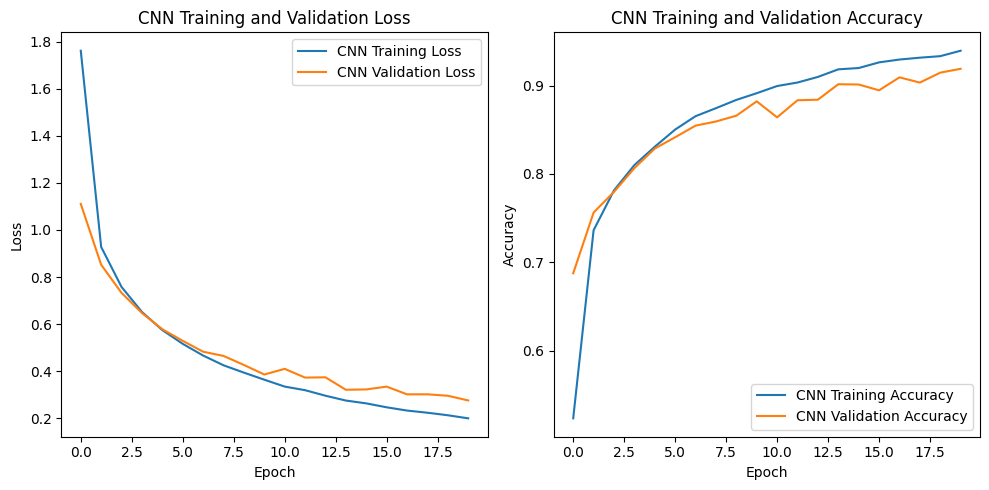

In [5]:
X_train_reshaped = X_train_scaled.reshape(-1, 16, 1, 1)
X_test_reshaped = X_test_scaled.reshape(-1, 16, 1, 1)

# CNN Model
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3, 1), activation='relu', input_shape=(16, 1, 1)),
    layers.MaxPooling2D((2, 1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss, accuracy = cnn_model.evaluate(X_test_reshaped, y_test)
print(f"CNN Test Loss: {loss:.4f}")
print(f"CNN Test Accuracy: {accuracy:.4f}")

y_pred_cnn = np.argmax(cnn_model.predict(X_test_reshaped), axis=1)
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print("CNN Accuracy:", accuracy_cnn)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **Recurrent Neural Network (RNN)**

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2672 - loss: 2.7081 - val_accuracy: 0.6569 - val_loss: 1.4157
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6847 - loss: 1.2441 - val_accuracy: 0.7319 - val_loss: 1.0217
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7442 - loss: 0.9403 - val_accuracy: 0.7638 - val_loss: 0.8573
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7770 - loss: 0.7960 - val_accuracy: 0.7841 - val_loss: 0.7517
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8116 - loss: 0.6881 - val_accuracy: 0.8059 - val_loss: 0.6783
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8253 - loss: 0.6270 - val_accuracy: 0.8216 - val_loss: 0.6189
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8427 - loss: 0.5776 - val_accuracy: 0.8372 - val_loss: 0.5744
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8505 - loss: 0.5311 - val_accuracy: 0.8478 - val_

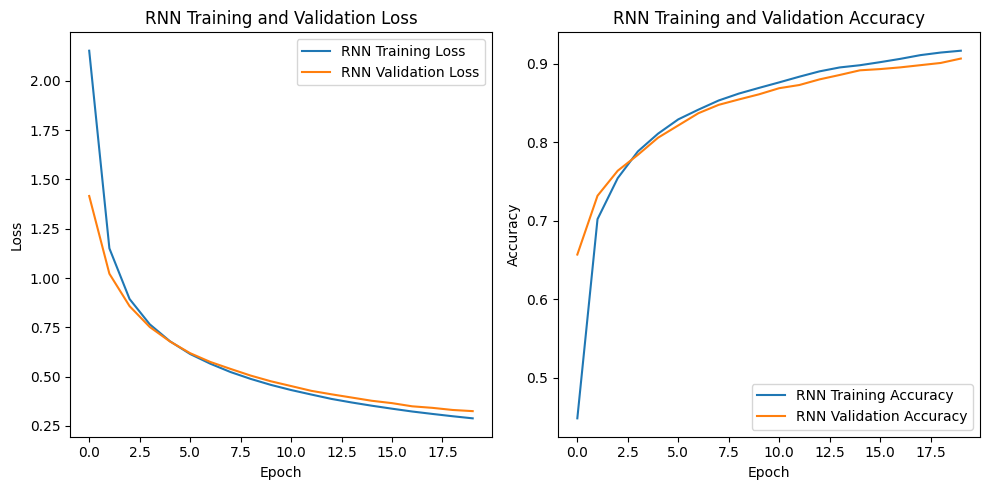

In [6]:

X_train_reshaped_rnn = X_train_scaled.reshape(-1, 1, X_train_scaled.shape[1])
X_test_reshaped_rnn = X_test_scaled.reshape(-1, 1, X_test_scaled.shape[1])

# RNN Model
rnn_model = keras.Sequential([
    layers.SimpleRNN(64, activation='relu', input_shape=(X_train_reshaped_rnn.shape[1], X_train_reshaped_rnn.shape[2])),
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])

rnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

rnn_history = rnn_model.fit(X_train_reshaped_rnn, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss, accuracy = rnn_model.evaluate(X_test_reshaped_rnn, y_test)
print(f"RNN Test Loss: {loss:.4f}")
print(f"RNN Test Accuracy: {accuracy:.4f}")

y_pred_rnn = np.argmax(rnn_model.predict(X_test_reshaped_rnn), axis=1)
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
print("RNN Accuracy:", accuracy_rnn)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['loss'], label='RNN Training Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('RNN Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('RNN Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Long Short-Term Memory (LSTM)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.1362 - loss: 2.9819 - val_accuracy: 0.3581 - val_loss: 2.1980
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3960 - loss: 2.0771 - val_accuracy: 0.5175 - val_loss: 1.7142
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5354 - loss: 1.6295 - val_accuracy: 0.5950 - val_loss: 1.3938
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6170 - loss: 1.3151 - val_accuracy: 0.6513 - val_loss: 1.2151
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6678 - loss: 1.1364 - val_accuracy: 0.6847 - val_loss: 1.0610
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7011 - loss: 1.0160 - val_accuracy: 0.7103 - val_loss: 0.9956
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7412 - loss: 0.8920 - val_accuracy: 0.7400 - val_loss: 0.8861
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7687 - loss: 0.7949 - val_accuracy: 0.7591 -

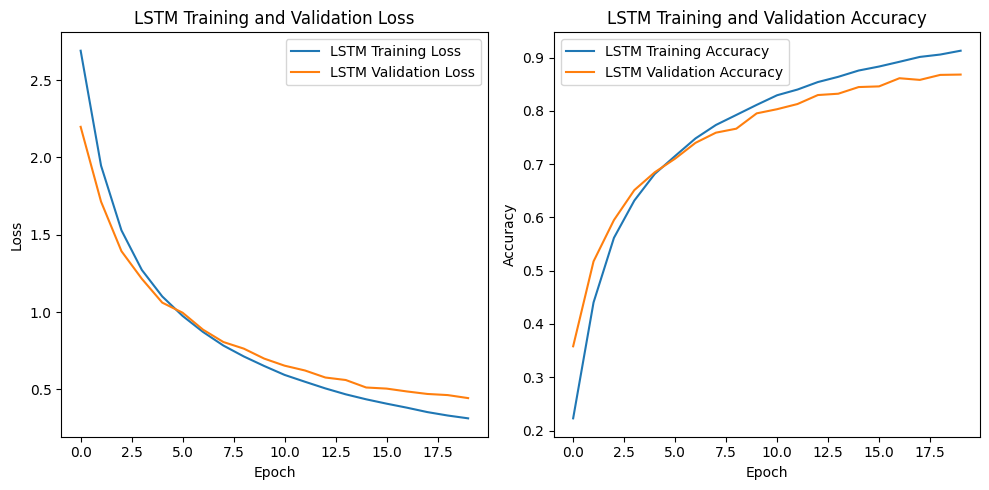

In [14]:
# LSTM Model
lstm_model = keras.Sequential([
    layers.LSTM(64, input_shape=(X_train_reshaped_lstm.shape[1], X_train_reshaped_lstm.shape[2])),
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])
lstm_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

X_train_reshaped_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

lstm_history = lstm_model.fit(X_train_reshaped_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss, accuracy = lstm_model.evaluate(X_test_reshaped_lstm, y_test)
print(f"LSTM Test Loss: {loss:.4f}")
print(f"LSTM Test Accuracy: {accuracy:.4f}")

y_pred_lstm = np.argmax(lstm_model.predict(X_test_reshaped_lstm), axis=1)
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print("LSTM Accuracy:", accuracy_lstm)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **comparison**

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score


precision_ffnn = precision_score(y_test, y_pred, average='weighted')
recall_ffnn = recall_score(y_test, y_pred, average='weighted')
f1_ffnn = f1_score(y_test, y_pred, average='weighted')

precision_cnn = precision_score(y_test, y_pred_cnn, average='weighted')
recall_cnn = recall_score(y_test, y_pred_cnn, average='weighted')
f1_cnn = f1_score(y_test, y_pred_cnn, average='weighted')

precision_rnn = precision_score(y_test, y_pred_rnn, average='weighted')
recall_rnn = recall_score(y_test, y_pred_rnn, average='weighted')
f1_rnn = f1_score(y_test, y_pred_rnn, average='weighted')

precision_lstm = precision_score(y_test, y_pred_lstm, average='weighted')
recall_lstm = recall_score(y_test, y_pred_lstm, average='weighted')
f1_lstm = f1_score(y_test, y_pred_lstm, average='weighted')


# Create a DataFrame for comparison
data = {
    'Model': ['FFNN', 'CNN', 'RNN', 'LSTM'],
    'Accuracy': [accuracy, accuracy_cnn, accuracy_rnn, accuracy_lstm],
    'Precision': [precision_ffnn, precision_cnn, precision_rnn, precision_lstm],
    'Recall': [recall_ffnn, recall_cnn, recall_rnn, recall_lstm],
    'F1-Score': [f1_ffnn, f1_cnn, f1_rnn, f1_lstm]
}

comparison_df = pd.DataFrame(data)
comparison_df

,Model,Accuracy,Precision,Recall,F1-Score
0,FFNN,0.87550,0.931849,0.92950,0.929670
1,CNN,0.91800,0.920843,0.91800,0.918278
2,RNN,0.90425,0.905994,0.90425,0.904125
3,LSTM,0.87550,0.876741,0.87550,0.875596


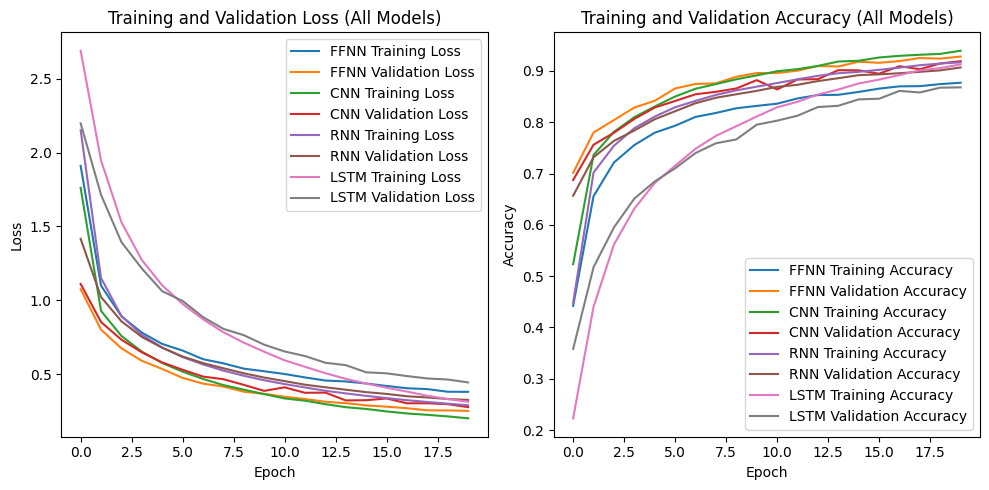

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='FFNN Training Loss')
plt.plot(history.history['val_loss'], label='FFNN Validation Loss')
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.plot(rnn_history.history['loss'], label='RNN Training Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (All Models)')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='FFNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='FFNN Validation Accuracy')
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (All Models)')
plt.legend()

plt.tight_layout()
plt.show()

Jsutification:


The best-performing architecture is CNN, achieving the highest accuracy of 0.918 with balanced precision, recall, and F1-score. Its training and validation loss curves show smooth convergence, indicating good generalization and minimal overfitting. CNN excels at recognizing patterns and spatial features, making it highly effective for this dataset. However, it can be computationally expensive and less suitable for sequential data compared to RNNs or LSTMs. Overall, CNN stands out as the most effective model, delivering strong accuracy and robust performance.






